In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 
from ipywidgets import IntProgress
from IPython.display import display
from keras.callbacks import EarlyStopping

INPUT_SIZE = 40

class_names = ['fist', 'no-fist']

(train_images, train_labels) = [], []
(test_images, test_labels) = [], []

input_root = "./input/fist"

train_paths = [input_root + "/train"]
test_paths = [input_root + "/test"]

file_count = 0
for root_dir, cur_dir, files in os.walk(input_root):
    file_count += len(files)

f = IntProgress(min=0, max=file_count, description='Loading:')
display(f)

for class_id, class_name in enumerate(class_names):
    for train_path in train_paths:
        for dirname, _, filenames in os.walk(os.path.join(train_path, class_name)):
            for filename in filenames:
                image = cv2.imread(os.path.join(dirname, filename), cv2.IMREAD_GRAYSCALE)
                image = cv2.resize(image, (INPUT_SIZE, INPUT_SIZE))
                train_images.append(image)
                train_labels.append(class_id)
                f.value += 1
            

for class_id, class_name in enumerate(class_names):
    for test_path in test_paths:
        for dirname, _, filenames in os.walk(os.path.join(test_path, class_name)):
            for filename in filenames:
                image = cv2.imread(os.path.join(dirname, filename), cv2.IMREAD_GRAYSCALE)
                image = cv2.resize(image, (INPUT_SIZE, INPUT_SIZE))
                test_images.append(image)
                test_labels.append(class_id)
                f.value += 1

2022-12-11 22:56:33.963640: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-11 22:56:34.073040: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-11 22:56:34.555357: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.7/lib64:
2022-12-11 22:56:34.555420: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

IntProgress(value=0, description='Loading:', max=20697)

In [2]:
train_images = np.array(train_images).reshape(-1, INPUT_SIZE, INPUT_SIZE, 1) / 255.0
train_labels = np.array(train_labels)
test_images = np.array(test_images).reshape(-1, INPUT_SIZE, INPUT_SIZE, 1) / 255.0
test_labels = np.array(test_labels)

In [3]:
print(train_images.shape)
print(len(train_labels))

(12369, 40, 40, 1)
12369


In [4]:
print(test_images.shape)
print(len(test_labels))

(8328, 40, 40, 1)
8328


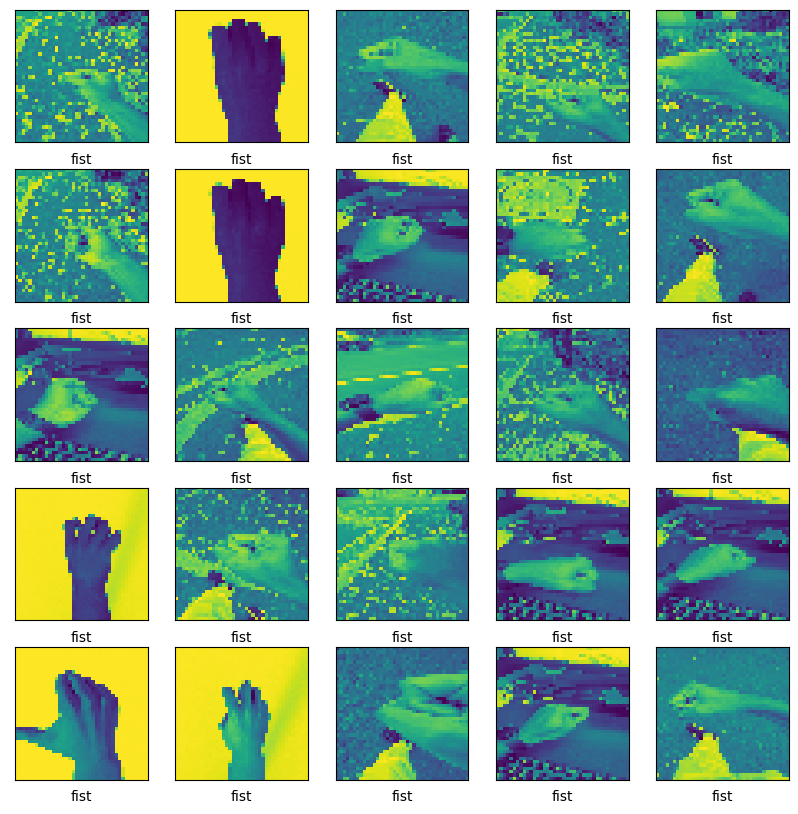

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(train_images.shape[1:])),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)
model.summary()

2022-12-11 22:59:50.277167: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 22:59:50.348104: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 22:59:50.348283: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

2022-12-11 22:59:50.353179: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-11 22:59:50.355121: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 22:59:50.355278: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 22:59:50.355410: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [7]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)
model.fit(train_images, train_labels, validation_split=0.1, epochs=100, callbacks=[early_stopping])

Epoch 1/100


2022-12-11 22:59:52.044073: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 71244800 exceeds 10% of free system memory.
2022-12-11 22:59:52.130031: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 71244800 exceeds 10% of free system memory.
2022-12-11 22:59:54.099576: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


348/348 [==============================] - 5s 4ms/step - loss: 0.2662 - accuracy: 0.8715 - val_loss: 0.0327 - val_accuracy: 0.9903
Epoch 2/100
348/348 [==============================] - 1s 3ms/step - loss: 0.0510 - accuracy: 0.9803 - val_loss: 0.0074 - val_accuracy: 0.9984
Epoch 3/100
348/348 [==============================] - 1s 3ms/step - loss: 0.0314 - accuracy: 0.9881 - val_loss: 0.0153 - val_accuracy: 0.9943
Epoch 4/100
348/348 [==============================] - 1s 3ms/step - loss: 0.0226 - accuracy: 0.9921 - val_loss: 0.0222 - val_accuracy: 0.9895
Epoch 5/100
348/348 [==============================] - 1s 3ms/step - loss: 0.0104 - accuracy: 0.9958 - val_loss: 0.0281 - val_accuracy: 0.9871
Epoch 6/100
348/348 [==============================] - 1s 3ms/step - loss: 0.0149 - accuracy: 0.9947 - val_loss: 0.0264 - val_accuracy: 0.9895
Epoch 7/100
348/348 [==============================] - 1s 3ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0035 - val_accuracy: 0.9984
Epoch 8/100

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

2022-12-11 23:00:15.714058: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 53299200 exceeds 10% of free system memory.
2022-12-11 23:00:15.773235: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 53299200 exceeds 10% of free system memory.


261/261 - 0s - loss: 4.8071 - accuracy: 0.5628 - 397ms/epoch - 2ms/step

Test accuracy: 0.5628001689910889


In [9]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

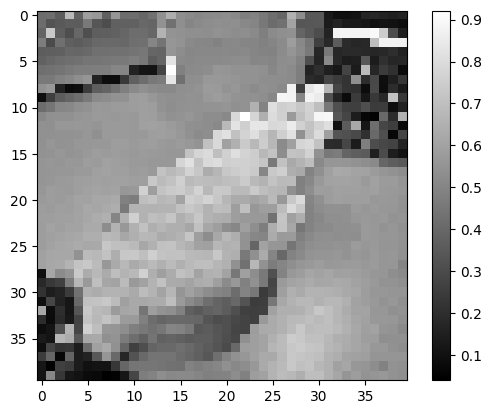

1/1 [==============================] - 0s 88ms/step
It's a > no-fist < With a confidence of 57.61122703552246


In [10]:
image_tt = cv2.imread(r"./validations//hand_test_9.jpg", 0)
image_tt = cv2.resize(image_tt, (INPUT_SIZE, INPUT_SIZE))
image_tt = np.expand_dims(image_tt,0)
image_tt = np.array(image_tt).reshape(-1, INPUT_SIZE, INPUT_SIZE, 1) / 255.0

plt.figure()
plt.gray()
plt.imshow(image_tt[0])
plt.colorbar()
plt.grid(False)
plt.show()

predictions = probability_model.predict(image_tt)
print("It's a >", class_names[np.argmax(predictions[0])], "< With a confidence of", predictions[0][np.argmax(predictions[0])] * 100)

In [12]:
probability_model.save(r"./output/v1/fist/")

INFO:tensorflow:Assets written to: ./output/v1/fist/assets


INFO:tensorflow:Assets written to: ./output/v1/fist/assets
